In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


In [ ]:

!pip install timm
import timm
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

In [ ]:
!pip install kaggle

In [ ]:
path = Path('/content/gdrive/MyDrive/lung_image_sets')


In [ ]:
all_files= get_image_files(path)


In [ ]:
from fastai.vision.augment import contrast
tfms = aug_transforms(size=384,

                      do_flip=False,
                      flip_vert=False,
                      max_rotate=0,
                      max_warp=0,

                      max_lighting=0.70,
                      p_lighting=0.60

                      )

In [ ]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.1),
                 get_y=parent_label,
                 item_tfms=Resize(384,method='squish'),
                 batch_tfms=tfms
)


In [ ]:

dls= dblock.dataloaders(all_files,bs=8)

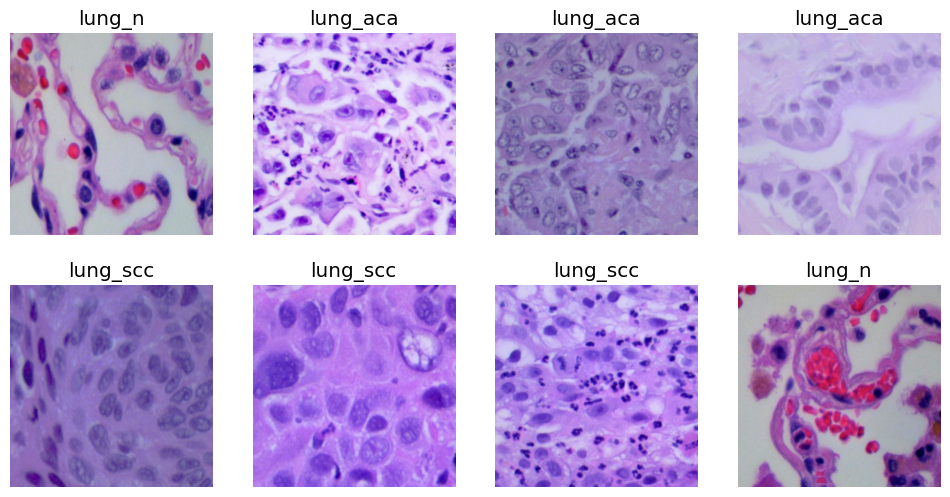

In [ ]:
dls.show_batch()


In [ ]:
import timm


In [ ]:
timm.list_models('vit*')


['vit_base_patch8_224',
 'vit_base_patch14_dinov2',
 'vit_base_patch14_reg4_dinov2',
 'vit_base_patch16_18x2_224',
 'vit_base_patch16_224',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_384',
 'vit_base_patch16_clip_224',
 'vit_base_patch16_clip_384',
 'vit_base_patch16_clip_quickgelu_224',
 'vit_base_patch16_gap_224',
 'vit_base_patch16_plus_240',
 'vit_base_patch16_reg8_gap_256',
 'vit_base_patch16_rpn_224',
 'vit_base_patch16_siglip_224',
 'vit_base_patch16_siglip_256',
 'vit_base_patch16_siglip_384',
 'vit_base_patch16_siglip_512',
 'vit_base_patch16_xp_224',
 'vit_base_patch32_224',
 'vit_base_patch32_384',
 'vit_base_patch32_clip_224',
 'vit_base_patch32_clip_256',
 'vit_base_patch32_clip_384',
 'vit_base_patch32_clip_448',
 'vit_base_patch32_clip_quickgelu_224',
 'vit_base_patch32_plus_256',
 'vit_base_r26_s32_224',
 'vit_base_r50_s16_224',
 'vit_base_r50_s16_384',
 'vit_base_resnet26d_224',
 'vit_base_resnet50d_224',
 'vit_giant_patch14_224',
 'vit_giant_patch14_clip_224',
 

In [ ]:
learn= vision_learner(dls,'vit_tiny_r_s16_p8_384',metrics=accuracy)

model.safetensors:   0%|          | 0.00/25.4M [00:00<?, ?B/s]

SuggestedLRs(valley=0.002511886414140463)

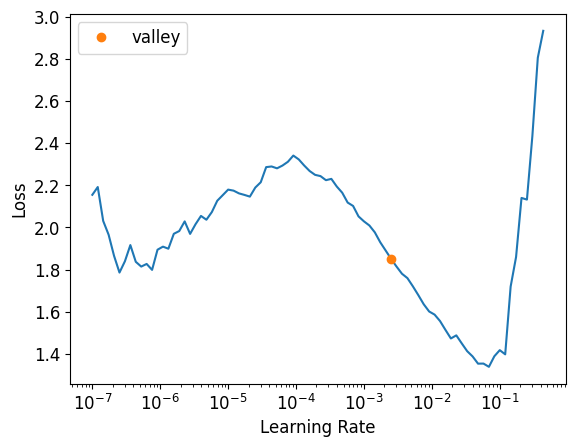

In [ ]:
learn.lr_find()


In [ ]:
learn.fit_one_cycle(50,1.8e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.212013,0.059697,0.980000,13:03
1,0.192537,0.070461,0.976667,01:22
2,0.247066,0.061497,0.974667,01:23
3,0.331242,0.120036,0.956667,01:22
4,0.259833,0.089751,0.966667,01:22
5,0.310411,0.483029,0.837333,01:21
6,0.405703,0.679858,0.796667,01:22
7,0.392269,0.130217,0.947333,01:23
8,0.441125,0.122164,0.950000,01:23
9,0.549367,0.472054,0.824667,01:23


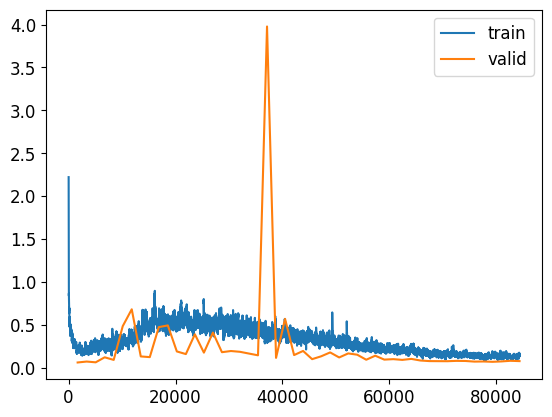

In [ ]:
learn.recorder.plot_loss()

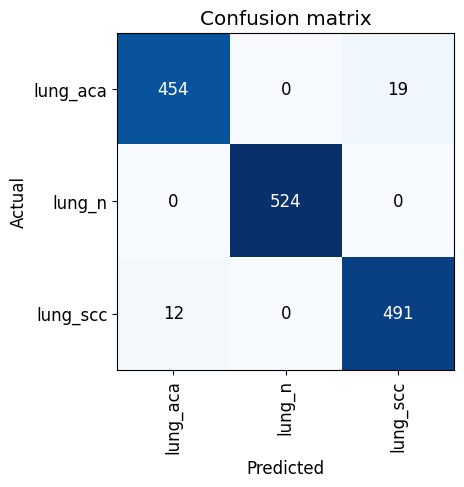

In [ ]:
interp= ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

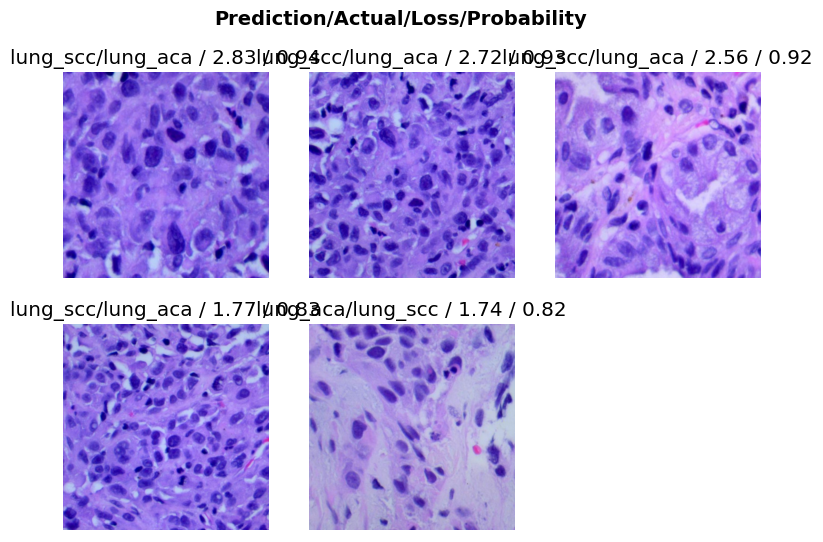

In [ ]:
interp.plot_top_losses(5)

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

    lung_aca       0.97      0.96      0.97       473
      lung_n       1.00      1.00      1.00       524
    lung_scc       0.96      0.98      0.97       503

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
learn.save("/content/gdrive/MyDrive/lung_cancer_vit_334")

Path('/content/gdrive/MyDrive/lung_cancer_vit_334.pth')

In [ ]:
learn.export("/content/gdrive/MyDrive/lung_cancer_vit_334.pkl")